# Student Dropout Prediction - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('data/raw/dummy_data.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (531, 24)


,student_id,age,gender,admission_grade,previous_education,semester_1_gpa,semester_2_gpa,semester_3_gpa,current_gpa,failed_courses,...,library_visits,online_portal_logins,participation_score,extracurricular_activities,scholarship_status,financial_aid,distance_from_campus,accommodation_type,actual_dropout,dropout_risk
0,STU000134,29.0,F,79.042825,Public,10.241564,7.189263,7.165727,12.680744,0,...,12,36,1.586602,4,Yes,No,17.694661,Campus,0,Medium
1,STU000230,32.0,M,78.627546,Private,17.543672,11.735724,18.723994,19.390169,0,...,11,36,4.512442,4,Yes,Yes,40.288925,Home,0,Low
2,STU000137,19.0,M,91.596985,Public,14.270701,12.217552,7.744387,NaN,0,...,12,140,7.994901,1,No,Yes,33.066299,Campus,0,NaN
3,STU000162,24.0,F,92.785029,Private,9.013437,15.061712,12.611788,NaN,0,...,19,104,8.630439,1,Yes,Yes,5.508655,Rented,0,NaN
4,STU000305,23.0,M,74.308896,International,9.822476,17.393769,8.394807,12.248803,0,...,28,31,9.367809,0,No,Yes,55.670721,Rented,0,Medium


## 1. Distribution Plots

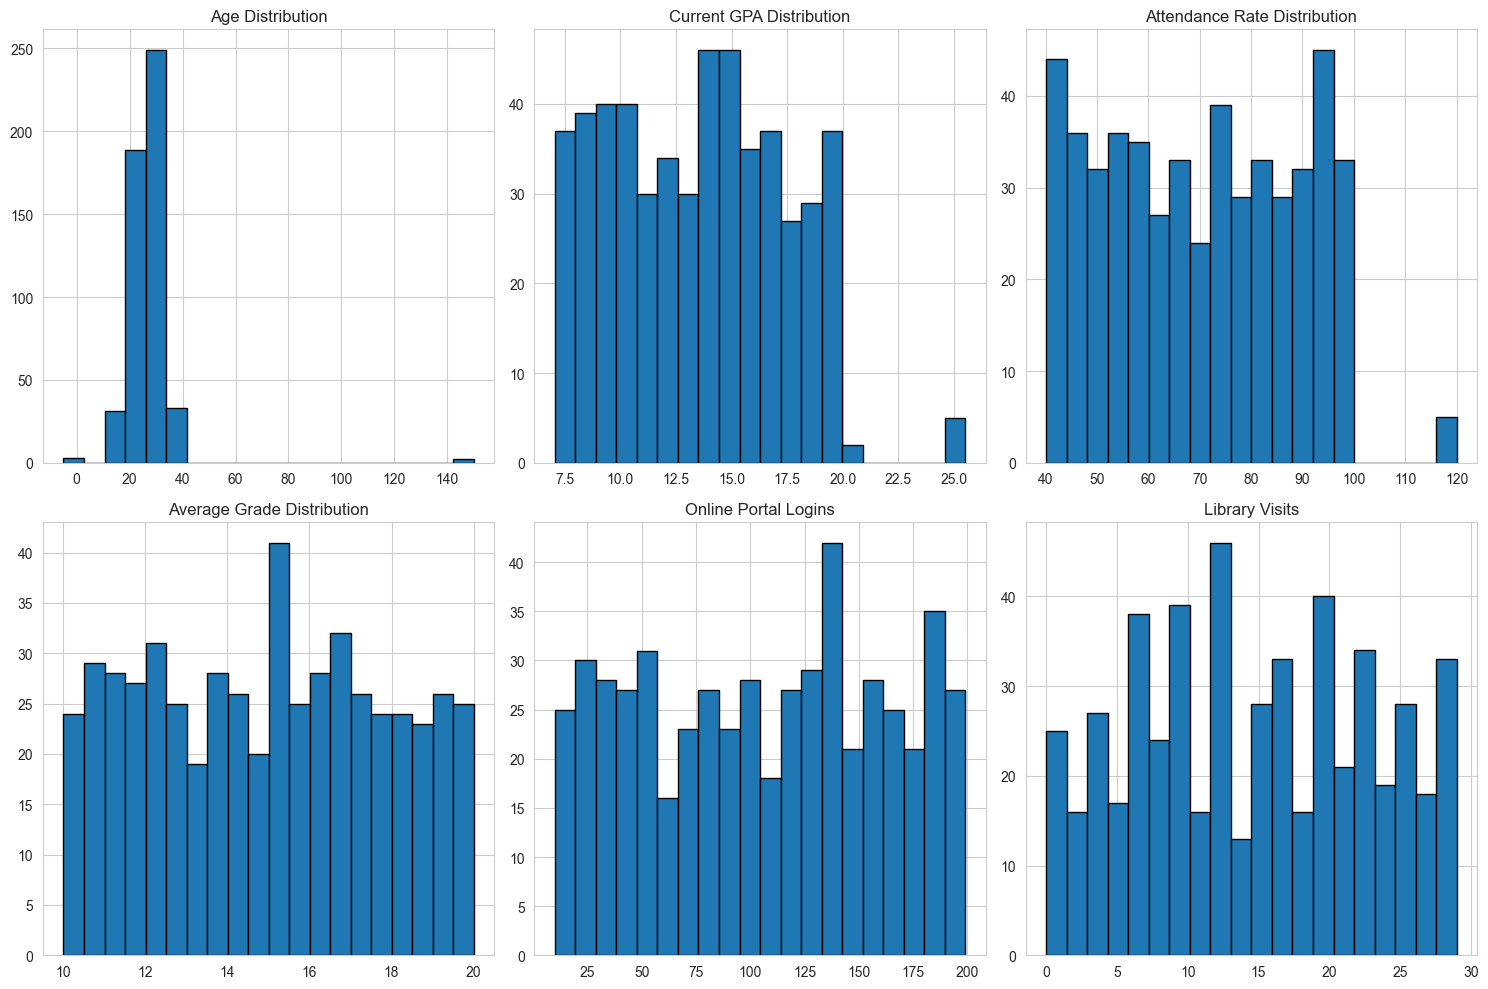

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
df['age'].hist(bins=20, ax=axes[0,0], edgecolor='black')
axes[0,0].set_title('Age Distribution')
df['current_gpa'].hist(bins=20, ax=axes[0,1], edgecolor='black')
axes[0,1].set_title('Current GPA Distribution')
df['attendance_rate'].hist(bins=20, ax=axes[0,2], edgecolor='black')
axes[0,2].set_title('Attendance Rate Distribution')
df['average_grade'].hist(bins=20, ax=axes[1,0], edgecolor='black')
axes[1,0].set_title('Average Grade Distribution')
df['online_portal_logins'].hist(bins=20, ax=axes[1,1], edgecolor='black')
axes[1,1].set_title('Online Portal Logins')
df['library_visits'].hist(bins=20, ax=axes[1,2], edgecolor='black')
axes[1,2].set_title('Library Visits')
plt.tight_layout()
plt.show()

## 2. Box Plots

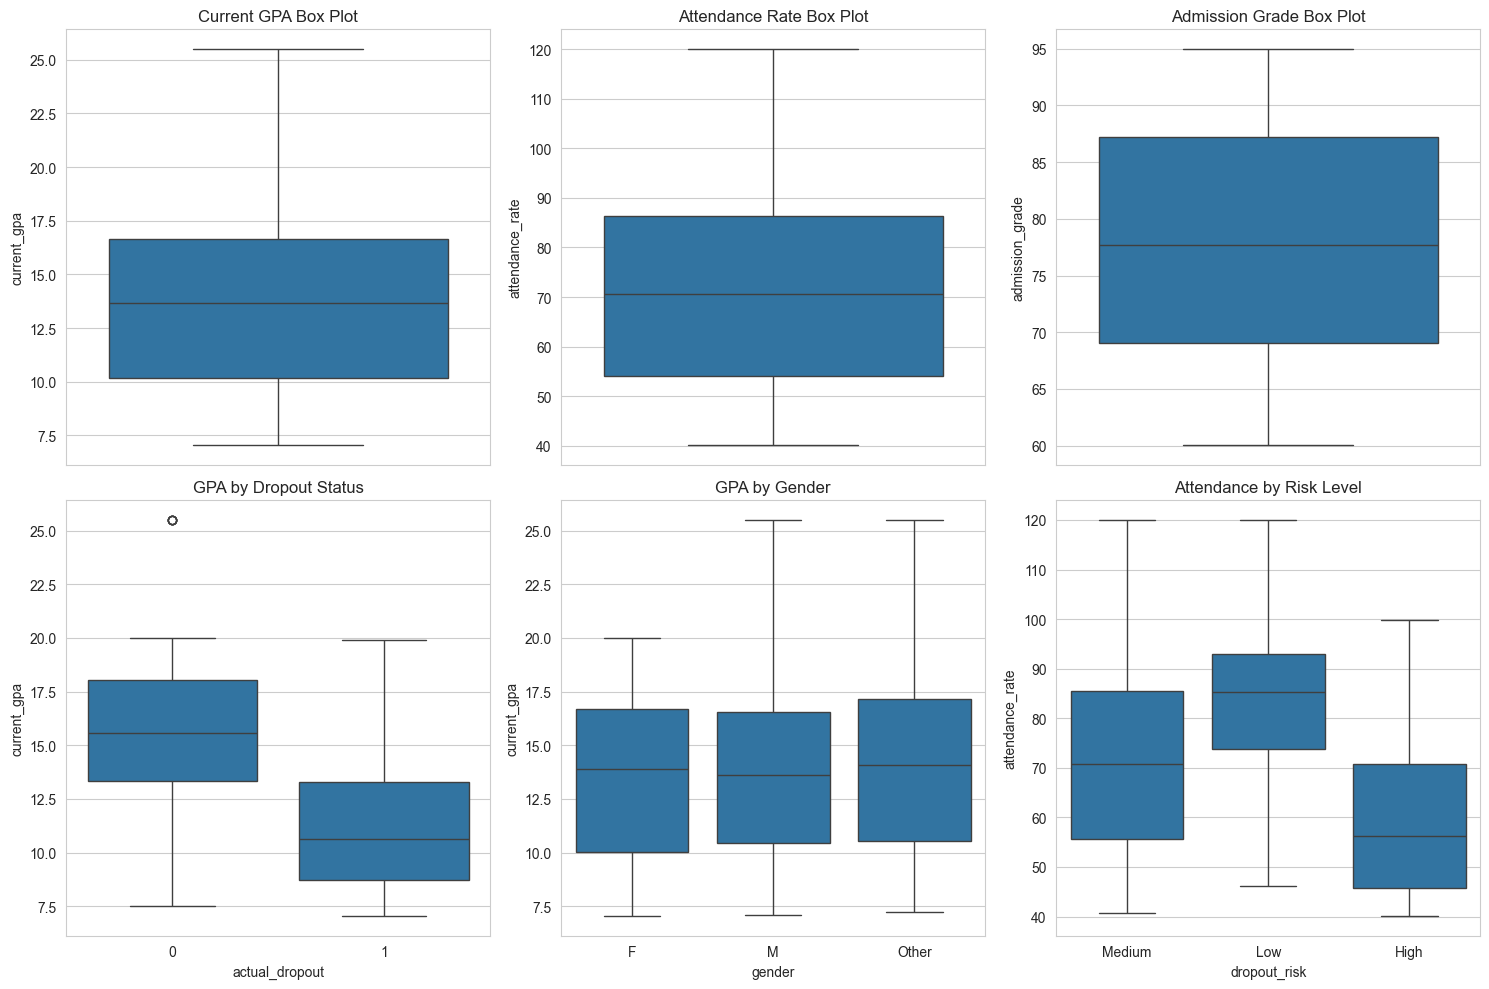

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=df, y='current_gpa', ax=axes[0,0])
axes[0,0].set_title('Current GPA Box Plot')
sns.boxplot(data=df, y='attendance_rate', ax=axes[0,1])
axes[0,1].set_title('Attendance Rate Box Plot')
sns.boxplot(data=df, y='admission_grade', ax=axes[0,2])
axes[0,2].set_title('Admission Grade Box Plot')
sns.boxplot(data=df, x='actual_dropout', y='current_gpa', ax=axes[1,0])
axes[1,0].set_title('GPA by Dropout Status')
sns.boxplot(data=df, x='gender', y='current_gpa', ax=axes[1,1])
axes[1,1].set_title('GPA by Gender')
sns.boxplot(data=df, x='dropout_risk', y='attendance_rate', ax=axes[1,2])
axes[1,2].set_title('Attendance by Risk Level')
plt.tight_layout()
plt.show()

## 3. Count Plots

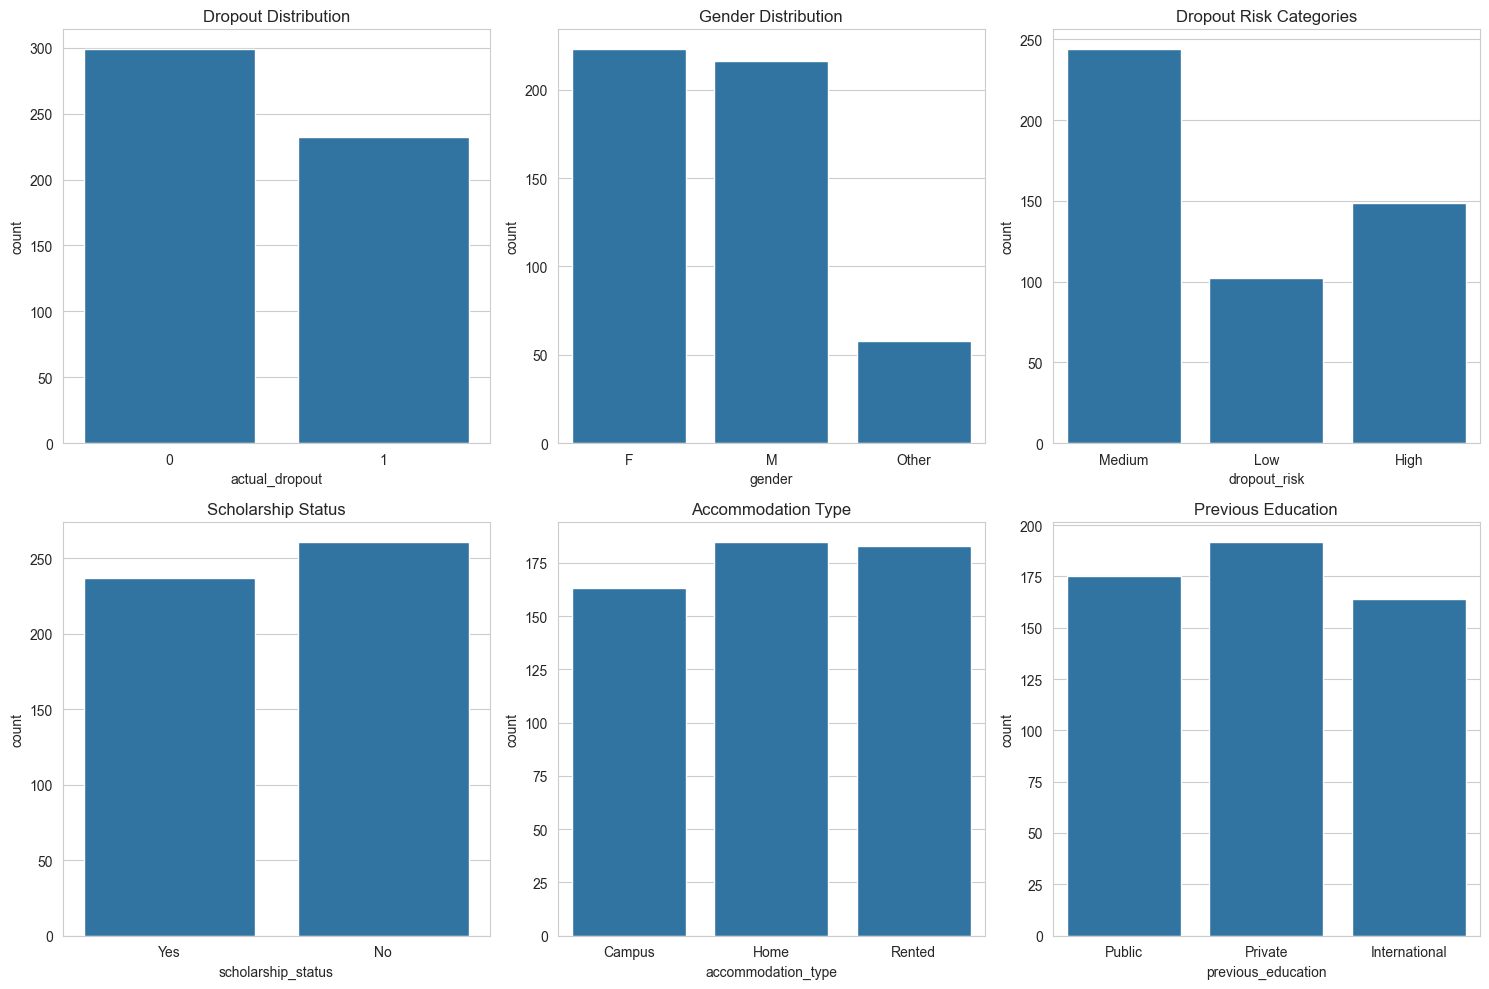

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data=df, x='actual_dropout', ax=axes[0,0])
axes[0,0].set_title('Dropout Distribution')
sns.countplot(data=df, x='gender', ax=axes[0,1])
axes[0,1].set_title('Gender Distribution')
sns.countplot(data=df, x='dropout_risk', ax=axes[0,2])
axes[0,2].set_title('Dropout Risk Categories')
sns.countplot(data=df, x='scholarship_status', ax=axes[1,0])
axes[1,0].set_title('Scholarship Status')
sns.countplot(data=df, x='accommodation_type', ax=axes[1,1])
axes[1,1].set_title('Accommodation Type')
sns.countplot(data=df, x='previous_education', ax=axes[1,2])
axes[1,2].set_title('Previous Education')
plt.tight_layout()
plt.show()

## 4. Correlation Heatmap

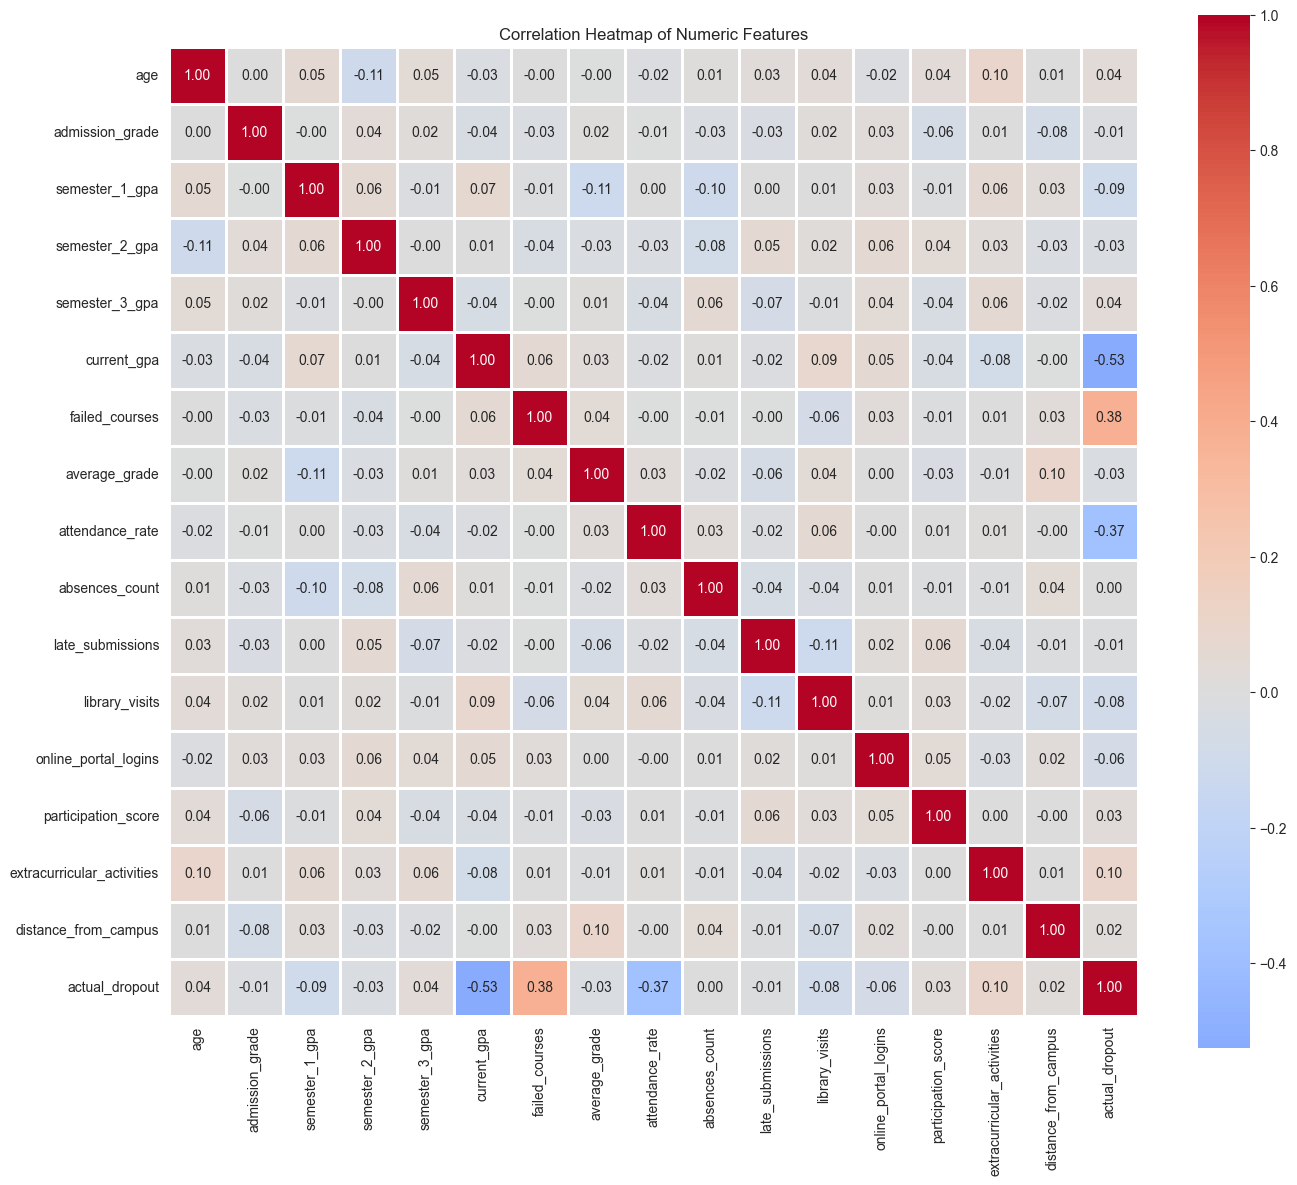

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## 5. Scatter Plots

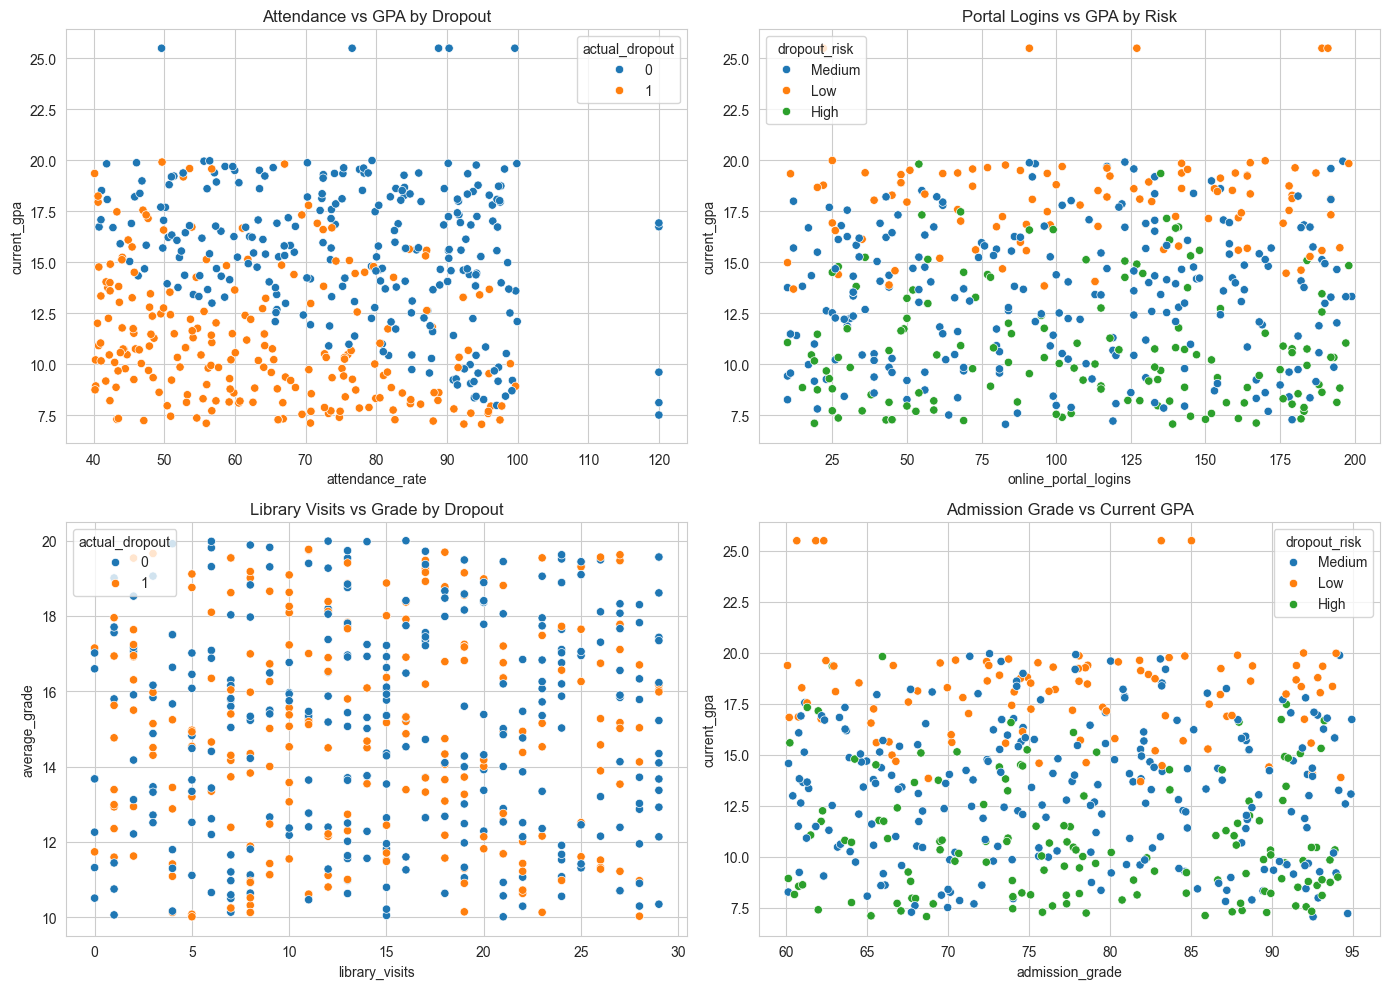

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(data=df, x='attendance_rate', y='current_gpa', hue='actual_dropout', ax=axes[0,0])
axes[0,0].set_title('Attendance vs GPA by Dropout')
sns.scatterplot(data=df, x='online_portal_logins', y='current_gpa', hue='dropout_risk', ax=axes[0,1])
axes[0,1].set_title('Portal Logins vs GPA by Risk')
sns.scatterplot(data=df, x='library_visits', y='average_grade', hue='actual_dropout', ax=axes[1,0])
axes[1,0].set_title('Library Visits vs Grade by Dropout')
sns.scatterplot(data=df, x='admission_grade', y='current_gpa', hue='dropout_risk', ax=axes[1,1])
axes[1,1].set_title('Admission Grade vs Current GPA')
plt.tight_layout()
plt.show()

## 6. Violin Plots

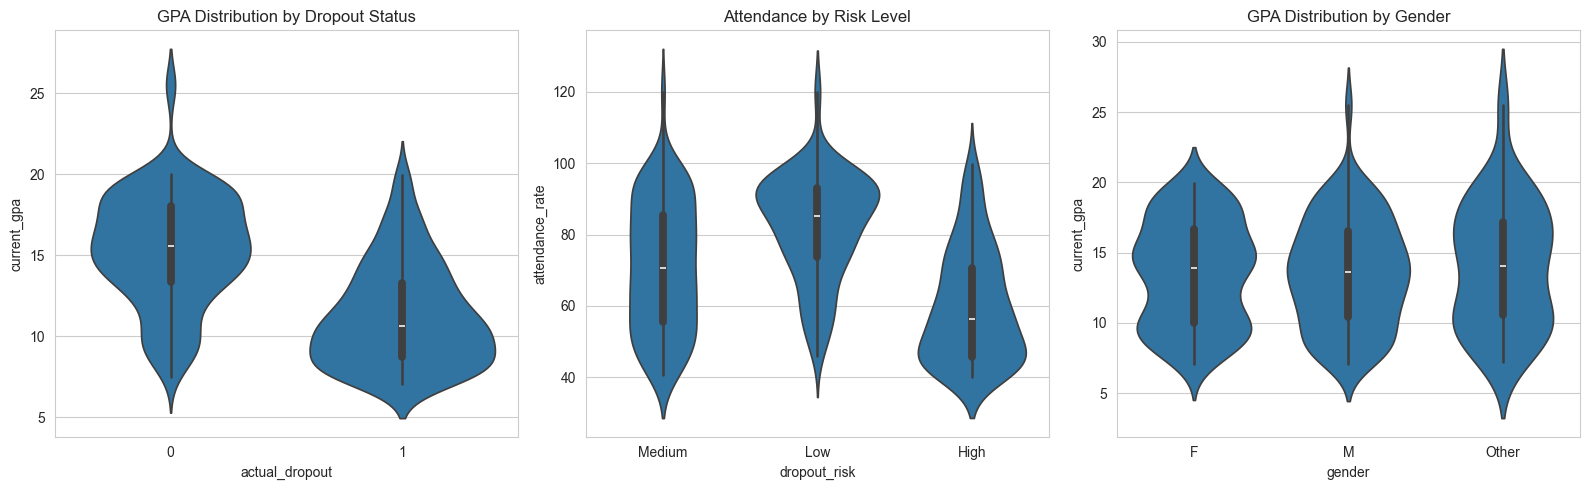

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.violinplot(data=df, x='actual_dropout', y='current_gpa', ax=axes[0])
axes[0].set_title('GPA Distribution by Dropout Status')
sns.violinplot(data=df, x='dropout_risk', y='attendance_rate', ax=axes[1])
axes[1].set_title('Attendance by Risk Level')
sns.violinplot(data=df, x='gender', y='current_gpa', ax=axes[2])
axes[2].set_title('GPA Distribution by Gender')
plt.tight_layout()
plt.show()

## 7. Pair Plot

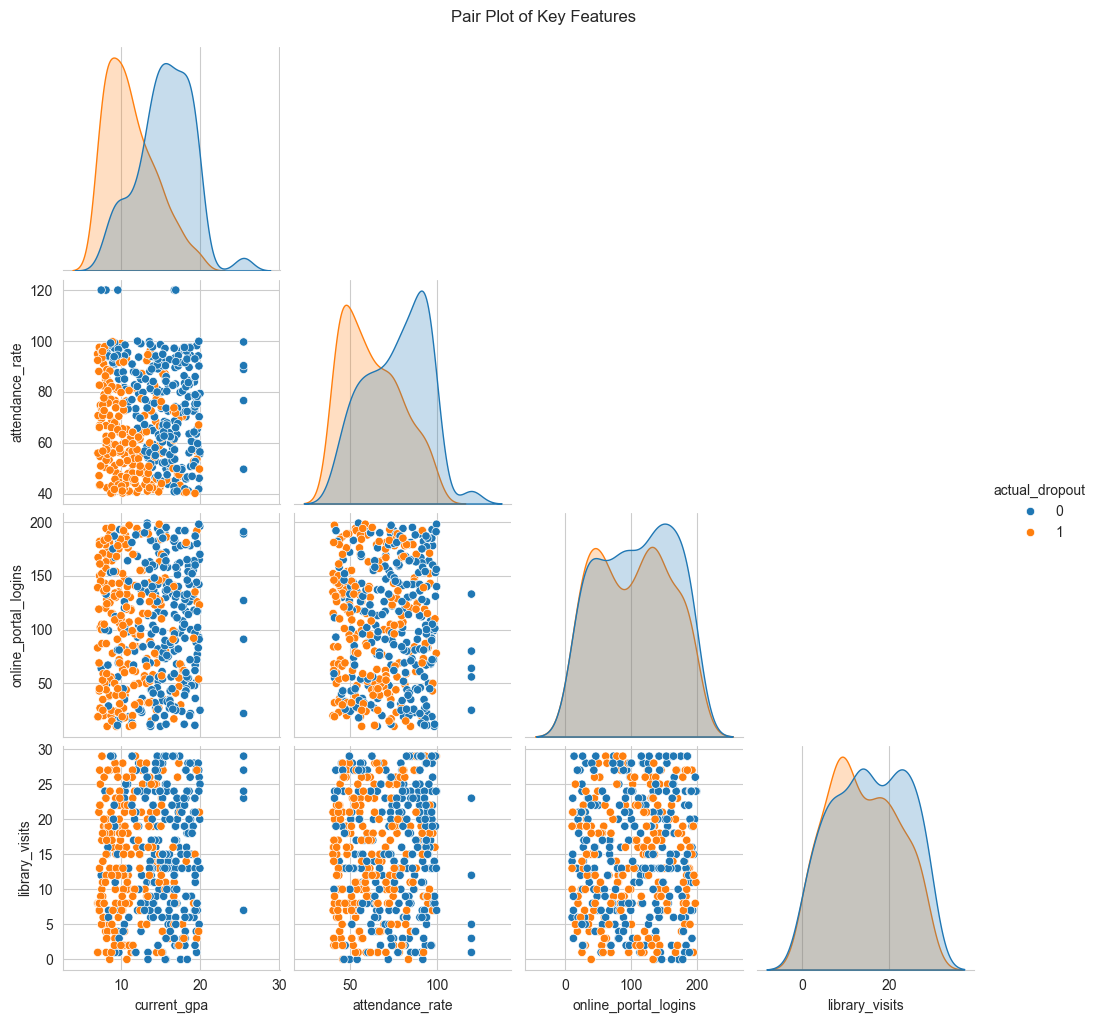

In [9]:
key_features = ['current_gpa', 'attendance_rate', 'online_portal_logins', 'library_visits', 'actual_dropout']
sns.pairplot(df[key_features].dropna(), hue='actual_dropout', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

## 8. Bar Charts

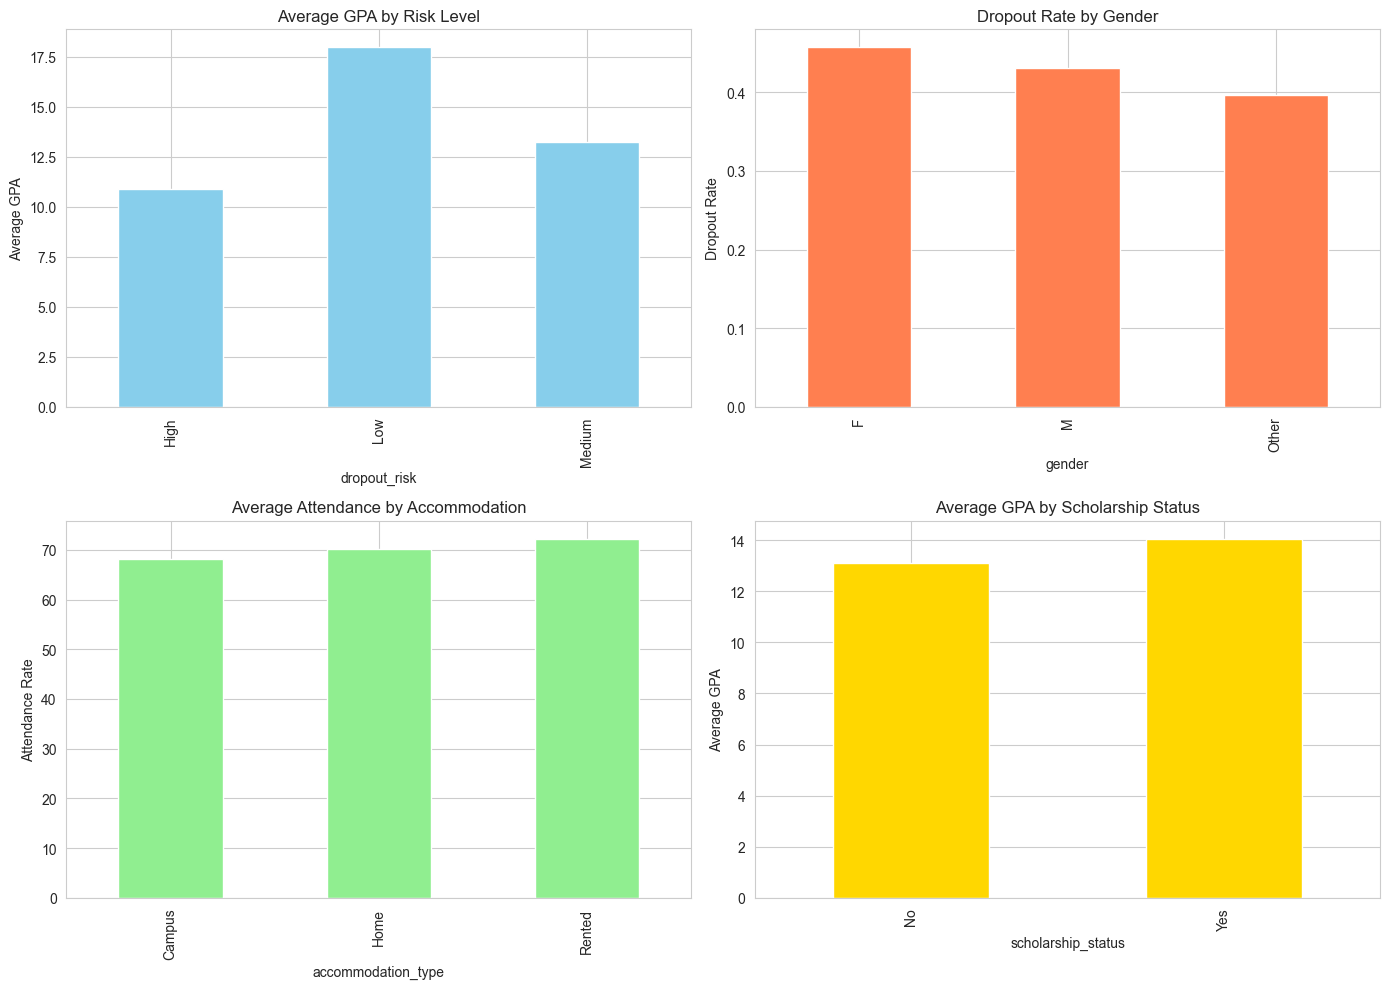

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df.groupby('dropout_risk')['current_gpa'].mean().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Average GPA by Risk Level')
axes[0,0].set_ylabel('Average GPA')
df.groupby('gender')['actual_dropout'].mean().plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Dropout Rate by Gender')
axes[0,1].set_ylabel('Dropout Rate')
df.groupby('accommodation_type')['attendance_rate'].mean().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Average Attendance by Accommodation')
axes[1,0].set_ylabel('Attendance Rate')
df.groupby('scholarship_status')['current_gpa'].mean().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Average GPA by Scholarship Status')
axes[1,1].set_ylabel('Average GPA')
plt.tight_layout()
plt.show()

## 9. Pie Charts

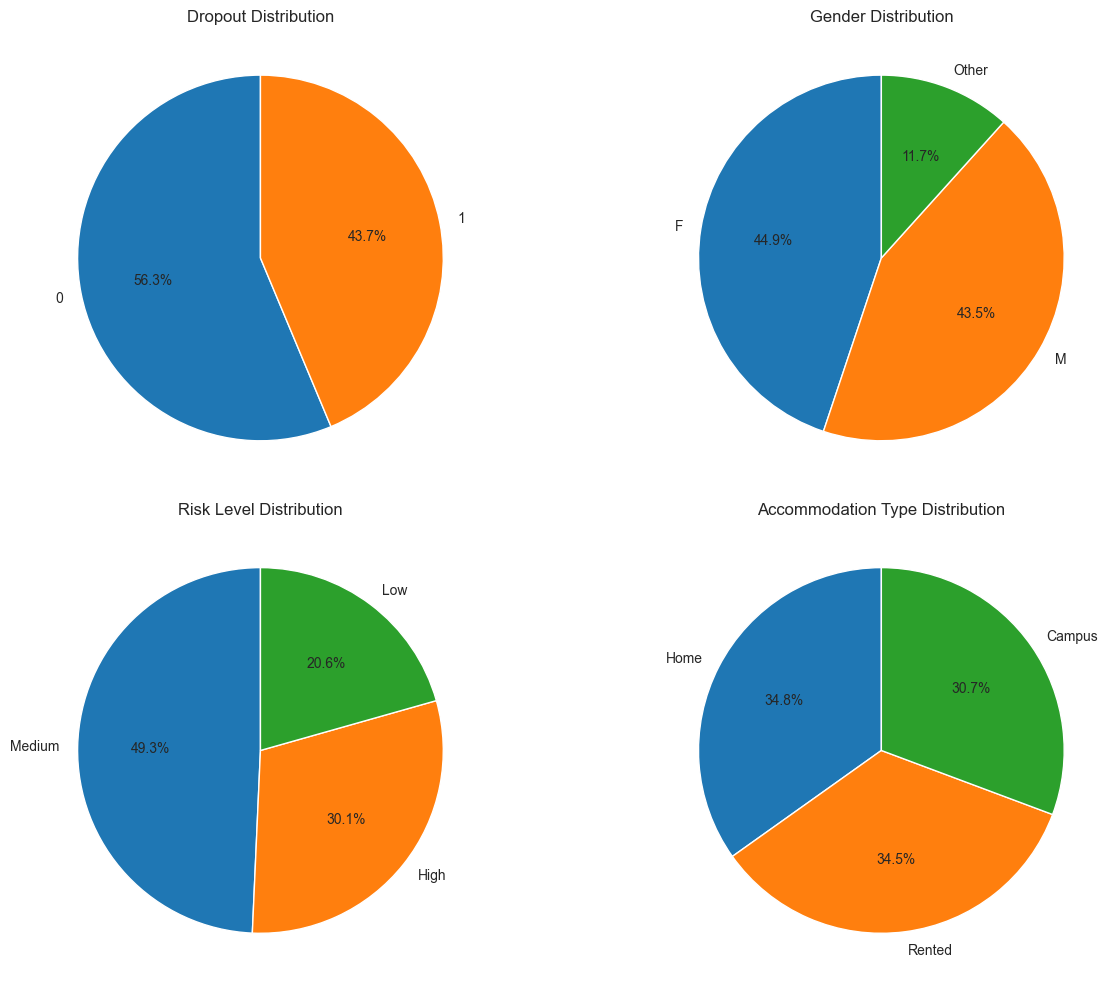

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df['actual_dropout'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Dropout Distribution')
axes[0,0].set_ylabel('')
df['gender'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_ylabel('')
df['dropout_risk'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Risk Level Distribution')
axes[1,0].set_ylabel('')
df['accommodation_type'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Accommodation Type Distribution')
axes[1,1].set_ylabel('')
plt.tight_layout()
plt.show()

## 10. KDE Plots

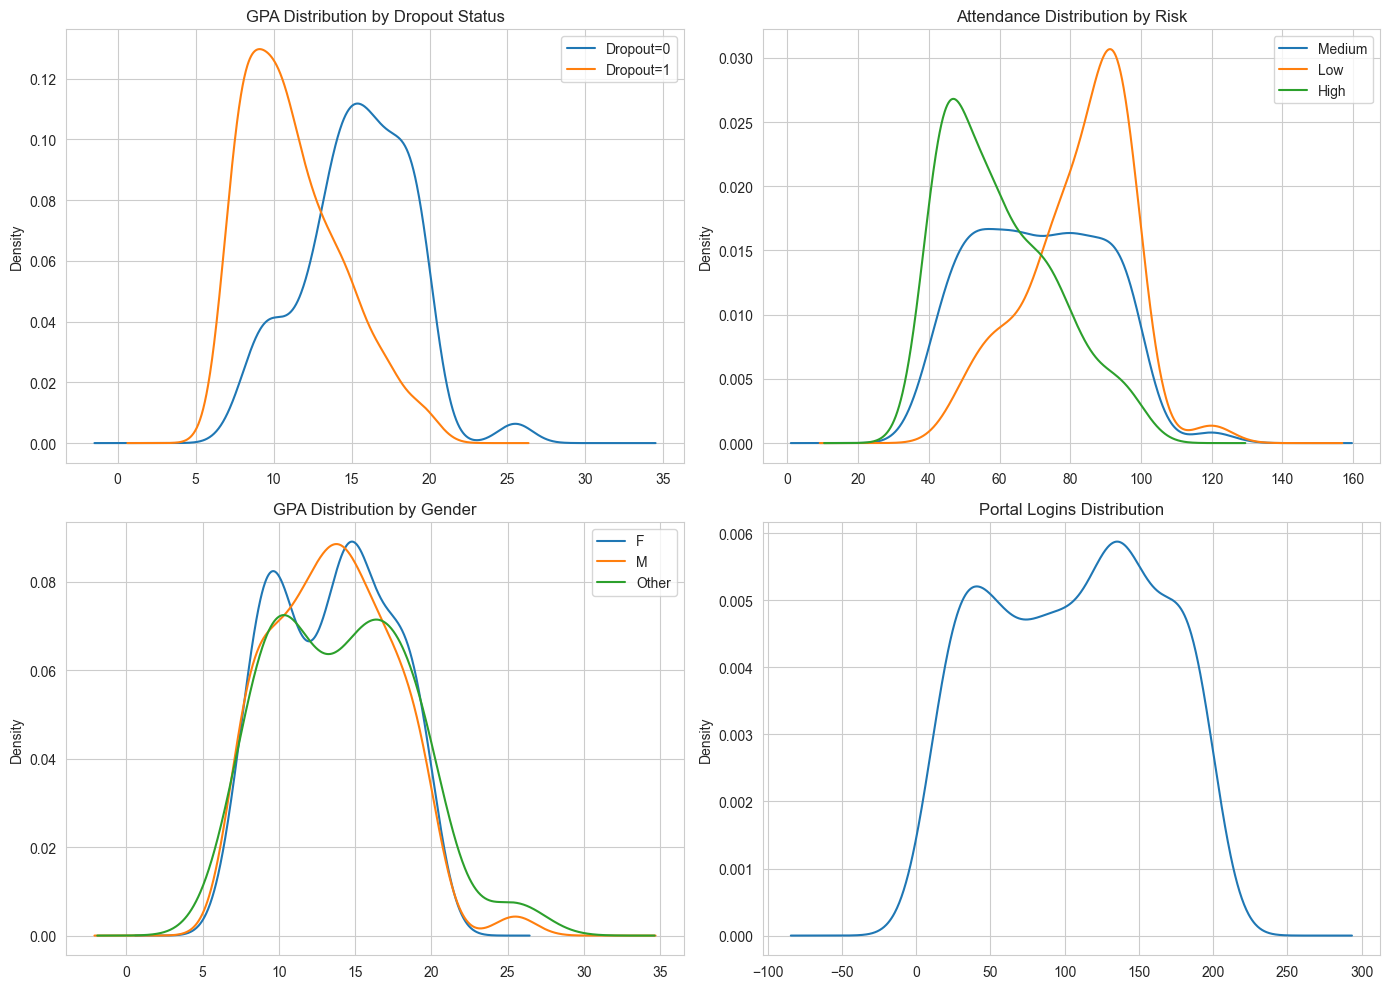

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for dropout in df['actual_dropout'].dropna().unique():
    df[df['actual_dropout']==dropout]['current_gpa'].dropna().plot(kind='kde', ax=axes[0,0], label=f'Dropout={int(dropout)}')
axes[0,0].set_title('GPA Distribution by Dropout Status')
axes[0,0].legend()
for risk in df['dropout_risk'].dropna().unique():
    df[df['dropout_risk']==risk]['attendance_rate'].dropna().plot(kind='kde', ax=axes[0,1], label=risk)
axes[0,1].set_title('Attendance Distribution by Risk')
axes[0,1].legend()
for gender in df['gender'].dropna().unique():
    df[df['gender']==gender]['current_gpa'].dropna().plot(kind='kde', ax=axes[1,0], label=gender)
axes[1,0].set_title('GPA Distribution by Gender')
axes[1,0].legend()
df['online_portal_logins'].dropna().plot(kind='kde', ax=axes[1,1])
axes[1,1].set_title('Portal Logins Distribution')
plt.tight_layout()
plt.show()

## 11. Stacked Bar Charts

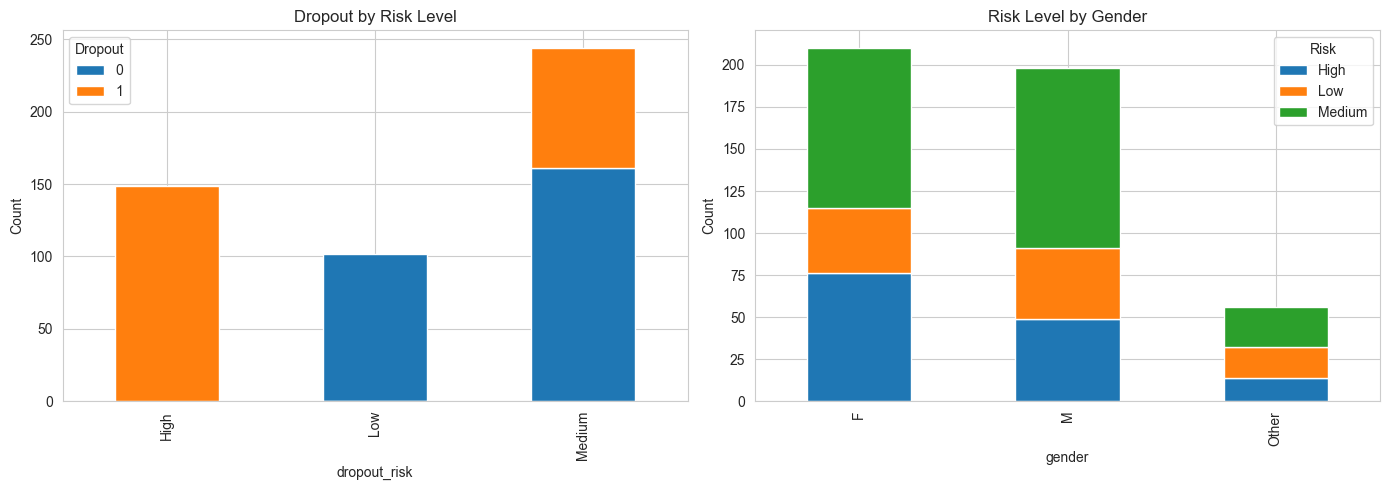

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
pd.crosstab(df['dropout_risk'], df['actual_dropout']).plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Dropout by Risk Level')
axes[0].set_ylabel('Count')
axes[0].legend(title='Dropout')
pd.crosstab(df['gender'], df['dropout_risk']).plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Risk Level by Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')
plt.tight_layout()
plt.show()

## 12. Line Plots - GPA Trends

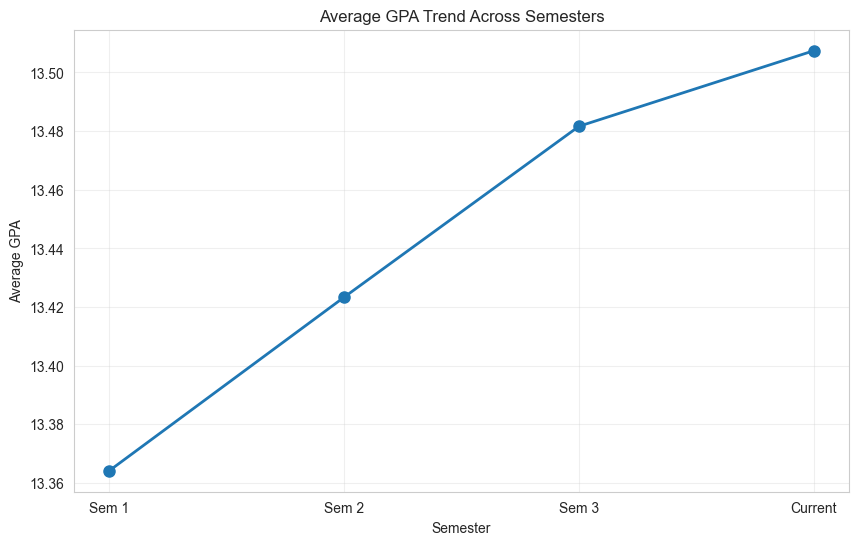

In [14]:
gpa_cols = ['semester_1_gpa', 'semester_2_gpa', 'semester_3_gpa', 'current_gpa']
gpa_means = df[gpa_cols].mean()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gpa_means)+1), gpa_means, marker='o', linewidth=2, markersize=8)
plt.title('Average GPA Trend Across Semesters')
plt.xlabel('Semester')
plt.ylabel('Average GPA')
plt.xticks(range(1, len(gpa_means)+1), ['Sem 1', 'Sem 2', 'Sem 3', 'Current'])
plt.grid(True, alpha=0.3)
plt.show()

## 13. Swarm Plot

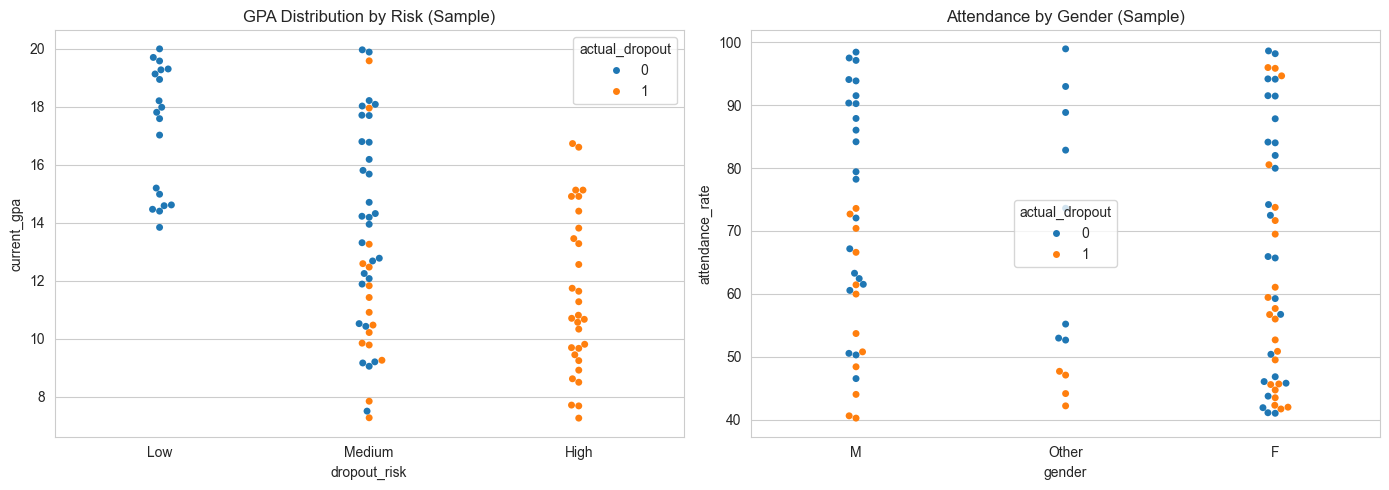

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.swarmplot(data=df.sample(100), x='dropout_risk', y='current_gpa', hue='actual_dropout', ax=axes[0])
axes[0].set_title('GPA Distribution by Risk (Sample)')
sns.swarmplot(data=df.sample(100), x='gender', y='attendance_rate', hue='actual_dropout', ax=axes[1])
axes[1].set_title('Attendance by Gender (Sample)')
plt.tight_layout()
plt.show()

## 14. Hexbin Plot

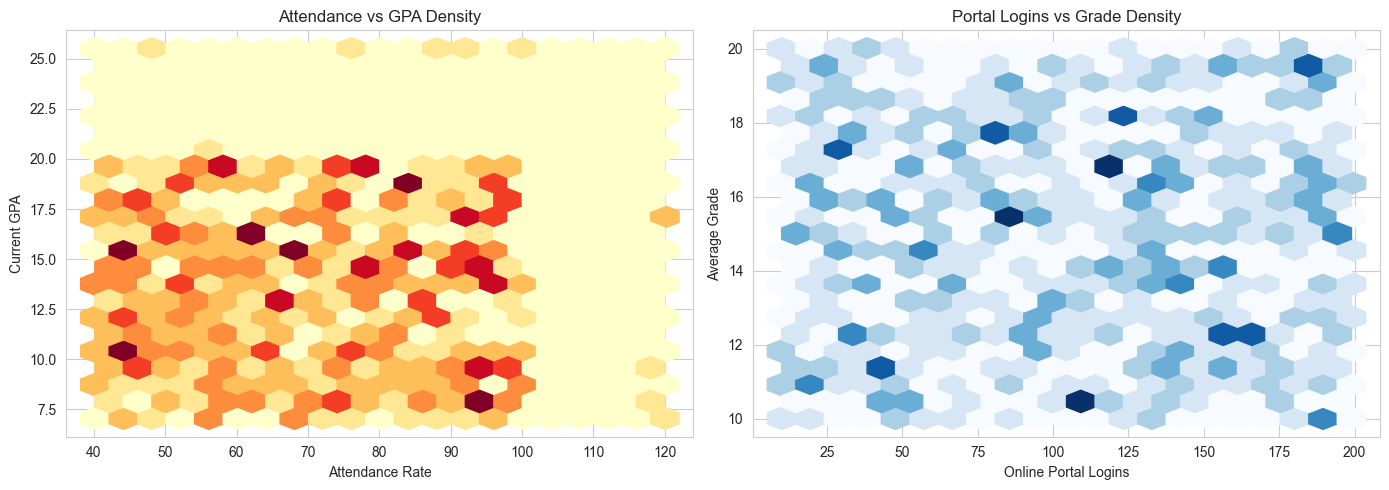

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df_clean = df.dropna(subset=['attendance_rate', 'current_gpa'])
axes[0].hexbin(df_clean['attendance_rate'], df_clean['current_gpa'], gridsize=20, cmap='YlOrRd')
axes[0].set_xlabel('Attendance Rate')
axes[0].set_ylabel('Current GPA')
axes[0].set_title('Attendance vs GPA Density')
df_clean2 = df.dropna(subset=['online_portal_logins', 'average_grade'])
axes[1].hexbin(df_clean2['online_portal_logins'], df_clean2['average_grade'], gridsize=20, cmap='Blues')
axes[1].set_xlabel('Online Portal Logins')
axes[1].set_ylabel('Average Grade')
axes[1].set_title('Portal Logins vs Grade Density')
plt.tight_layout()
plt.show()

## 15. Joint Plot

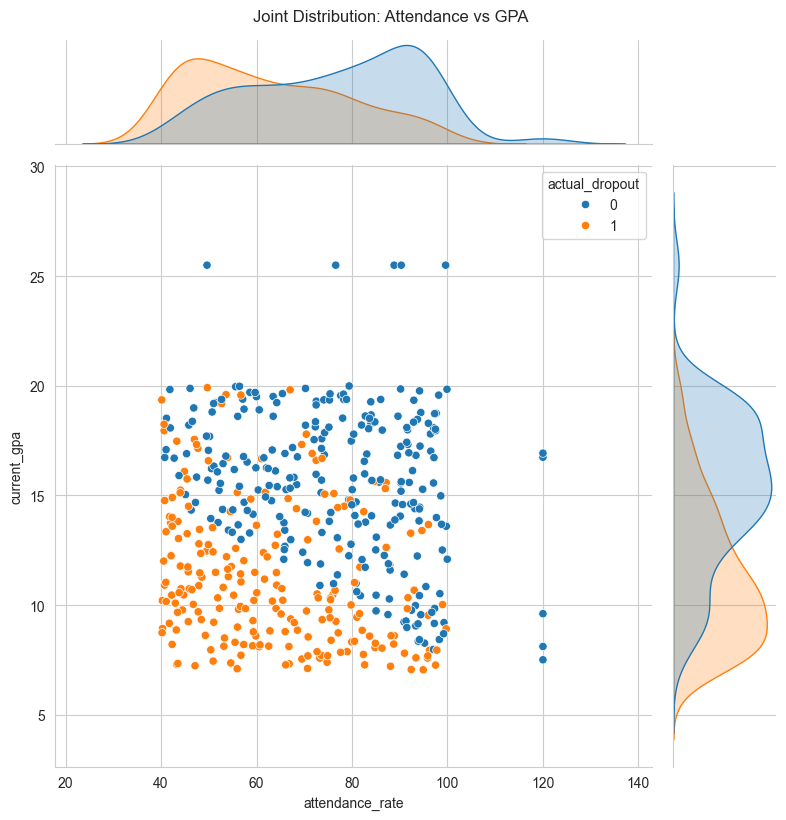

In [17]:
sns.jointplot(data=df, x='attendance_rate', y='current_gpa', hue='actual_dropout', kind='scatter', height=8)
plt.suptitle('Joint Distribution: Attendance vs GPA', y=1.02)
plt.show()

## 16. Ridge Plot (using KDE)

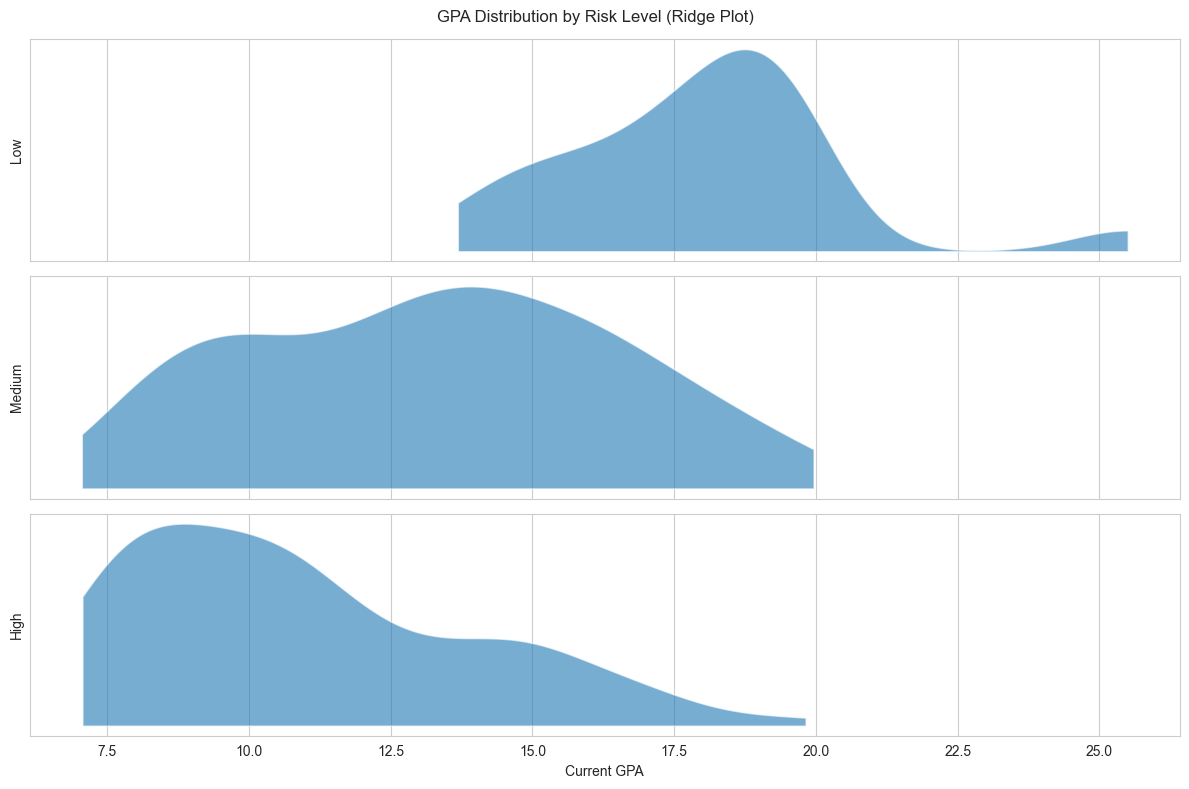

In [18]:
from scipy import stats
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for i, risk in enumerate(['Low', 'Medium', 'High']):
    data = df[df['dropout_risk']==risk]['current_gpa'].dropna()
    if len(data) > 0:
        density = stats.gaussian_kde(data)
        xs = np.linspace(data.min(), data.max(), 200)
        axes[i].fill_between(xs, density(xs), alpha=0.6)
        axes[i].set_ylabel(risk)
        axes[i].set_yticks([])
axes[2].set_xlabel('Current GPA')
fig.suptitle('GPA Distribution by Risk Level (Ridge Plot)')
plt.tight_layout()
plt.show()

## 17. Grouped Bar Chart

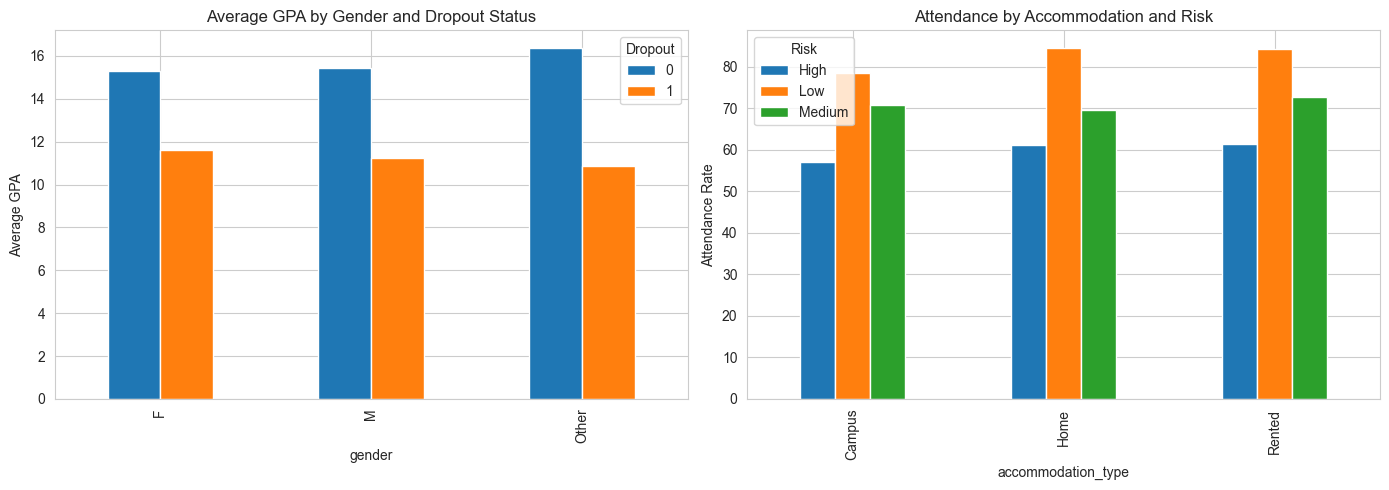

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df.groupby(['gender', 'actual_dropout'])['current_gpa'].mean().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Average GPA by Gender and Dropout Status')
axes[0].set_ylabel('Average GPA')
axes[0].legend(title='Dropout')
df.groupby(['accommodation_type', 'dropout_risk'])['attendance_rate'].mean().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Attendance by Accommodation and Risk')
axes[1].set_ylabel('Attendance Rate')
axes[1].legend(title='Risk')
plt.tight_layout()
plt.show()

## 18. Area Chart

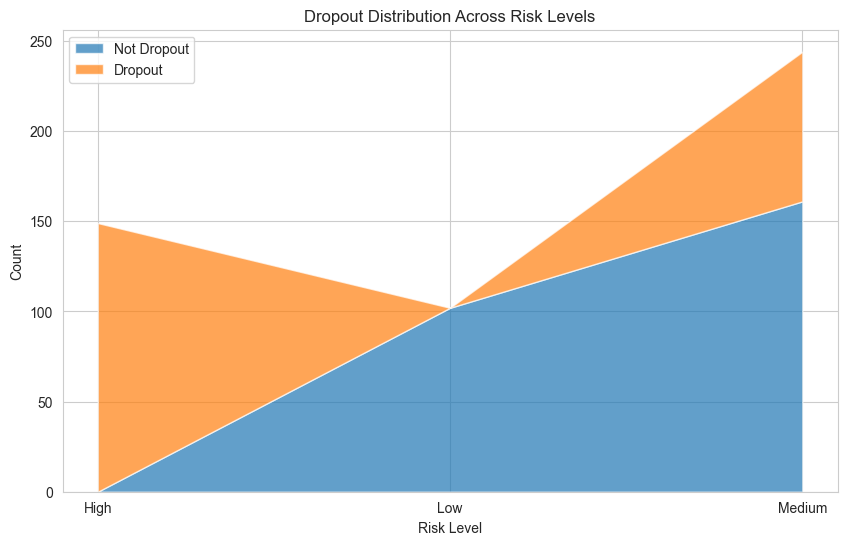

In [20]:
risk_counts = df.groupby(['dropout_risk', 'actual_dropout']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
plt.stackplot(range(len(risk_counts)), risk_counts[0], risk_counts[1], labels=['Not Dropout', 'Dropout'], alpha=0.7)
plt.title('Dropout Distribution Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks(range(len(risk_counts)), risk_counts.index)
plt.legend()
plt.show()

## 19. Radar Chart

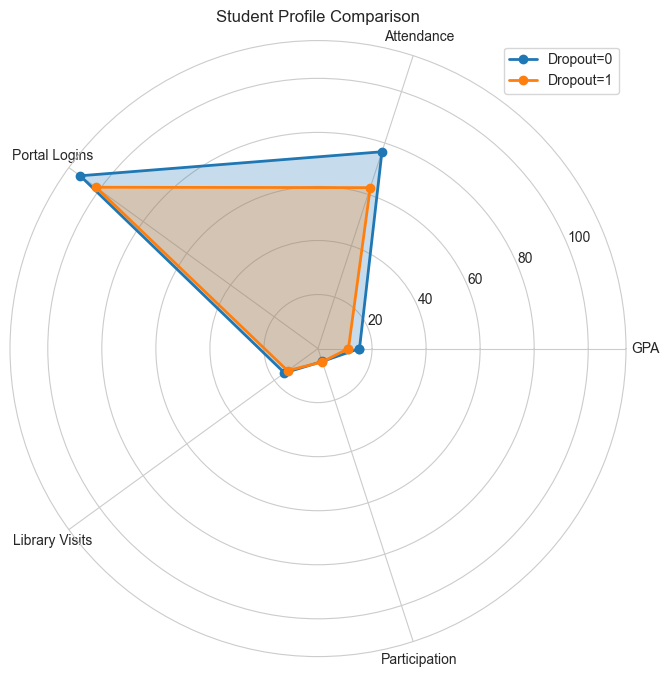

In [21]:
from math import pi
categories = ['GPA', 'Attendance', 'Portal Logins', 'Library Visits', 'Participation']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
for dropout in [0, 1]:
    values = [
        df[df['actual_dropout']==dropout]['current_gpa'].mean(),
        df[df['actual_dropout']==dropout]['attendance_rate'].mean(),
        df[df['actual_dropout']==dropout]['online_portal_logins'].mean(),
        df[df['actual_dropout']==dropout]['library_visits'].mean(),
        df[df['actual_dropout']==dropout]['participation_score'].mean()
    ]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Dropout={dropout}')
    ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Student Profile Comparison')
ax.legend()
plt.show()

## 20. Summary Statistics

In [22]:
print('Dataset Summary Statistics:')
print(df.describe())
print('\nMissing Values:')
print(df.isnull().sum())
print('\nDropout Rate:')
print(df['actual_dropout'].value_counts(normalize=True))

Dataset Summary Statistics:
              age  admission_grade  semester_1_gpa  semester_2_gpa  \
count  507.000000       531.000000      531.000000      531.000000   
mean    26.765286        77.721759       13.364158       13.423343   
std      9.464628        10.215614        3.678710        3.628267   
min     -5.000000        60.066470        7.005819        7.104518   
25%     22.000000        69.042432       10.031720       10.408315   
50%     27.000000        77.685616       13.339383       13.201741   
75%     31.000000        87.213875       16.516408       16.414504   
max    150.000000        94.953406       19.978894       19.997181   

       semester_3_gpa  current_gpa  failed_courses  average_grade  \
count      531.000000   514.000000      531.000000     531.000000   
mean        13.481634    13.507412        0.504708      14.948740   
std          3.846420     3.884323        0.871713       2.853810   
min          7.011510     7.051129        0.000000      10.011541